# 1. Data understanding, preparation and EDA

In [909]:
# Importing all required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [910]:
#Importing dataset
data = pd.read_csv(r"C:\Users\ankit\Desktop\upGrad\Course 5\Module 2 - Assignment - Advanced Regression\train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 1.1 Data Cleaning

In [911]:
#Checking dataset for any null values and data types of each feature

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [912]:
data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [913]:
#Changing data type of column from int64 to object
data['MSSubClass'] = data['MSSubClass'].astype('object') 

In [914]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [915]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [916]:
data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

<Axes: xlabel='LotFrontage', ylabel='Density'>

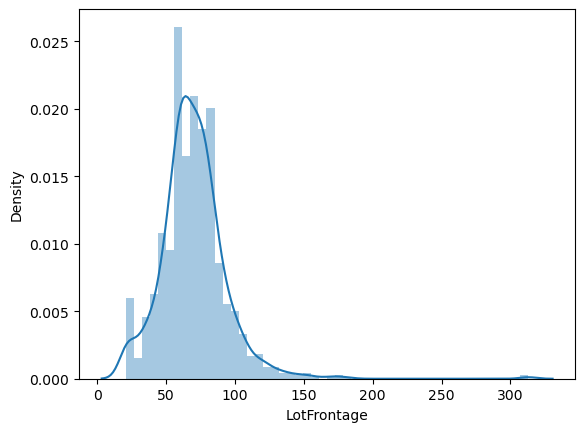

In [917]:
# Checking if 'LotFrontage' column is normally distributed to impute missing values

sns.distplot(data['LotFrontage'])

In [918]:
# Imputing missing values with mean for column

data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

In [919]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [920]:
#Changing data type of column from int64 to object

data['Street'] = data['Street'].astype('object')

In [921]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [922]:
data[data['Alley'].isna() == True]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1         60       RL    65.000000     8450   Pave   NaN      Reg   
1        2         20       RL    80.000000     9600   Pave   NaN      Reg   
2        3         60       RL    68.000000    11250   Pave   NaN      IR1   
3        4         70       RL    60.000000     9550   Pave   NaN      IR1   
4        5         60       RL    84.000000    14260   Pave   NaN      IR1   
5        6         50       RL    85.000000    14115   Pave   NaN      IR1   
6        7         20       RL    75.000000    10084   Pave   NaN      Reg   
7        8         60       RL    70.049958    10382   Pave   NaN      IR1   
8        9         50       RM    51.000000     6120   Pave   NaN      Reg   
9       10        190       RL    50.000000     7420   Pave   NaN      Reg   
10      11         20       RL    70.000000    11200   Pave   NaN      Reg   
11      12         60       RL    85.000000    11924   Pave   NaN      IR1   
12      13         20       RL    70.049958    12968   Pave   NaN      IR2   
13      14         20       RL    91.000000    10652   Pave   NaN      IR1   
14      15         20       RL    70.049958    10920   Pave   NaN      IR1   
15      16         45       RM    51.000000     6120   Pave   NaN      Reg   
16      17         20       RL    70.049958    11241   Pave   NaN      IR1   
17      18         90       RL    72.000000    10791   Pave   NaN      Reg   
18      19         20       RL    66.000000    13695   Pave   NaN      Reg   
19      20         20       RL    70.000000     7560   Pave   NaN      Reg   
20      21         60       RL   101.000000    14215   Pave   NaN      IR1   
22      23         20       RL    75.000000     9742   Pave   NaN      Reg   
23      24        120       RM    44.000000     4224   Pave   NaN      Reg   
24      25         20       RL    70.049958     8246   Pave   NaN      IR1   
25      26         20       RL   110.000000    14230   Pave   NaN      Reg   
26      27         20       RL    60.000000     7200   Pave   NaN      Reg   
27      28         20       RL    98.000000    11478   Pave   NaN      Reg   
28      29         20       RL    47.000000    16321   Pave   NaN      IR1   
29      30         30       RM    60.000000     6324   Pave   NaN      IR1   
31      32         20       RL    70.049958     8544   Pave   NaN      IR1   
32      33         20       RL    85.000000    11049   Pave   NaN      Reg   
33      34         20       RL    70.000000    10552   Pave   NaN      IR1   
34      35        120       RL    60.000000     7313   Pave   NaN      Reg   
35      36         60       RL   108.000000    13418   Pave   NaN      Reg   
36      37         20       RL   112.000000    10859   Pave   NaN      Reg   
37      38         20       RL    74.000000     8532   Pave   NaN      Reg   
38      39         20       RL    68.000000     7922   Pave   NaN      Reg   
39      40         90       RL    65.000000     6040   Pave   NaN      Reg   
40      41         20       RL    84.000000     8658   Pave   NaN      Reg   
41      42         20       RL   115.000000    16905   Pave   NaN      Reg   
42      43         85       RL    70.049958     9180   Pave   NaN      IR1   
43      44         20       RL    70.049958     9200   Pave   NaN      IR1   
44      45         20       RL    70.000000     7945   Pave   NaN      Reg   
45      46        120       RL    61.000000     7658   Pave   NaN      Reg   
46      47         50       RL    48.000000    12822   Pave   NaN      IR1   
47      48         20       FV    84.000000    11096   Pave   NaN      Reg   
48      49        190       RM    33.000000     4456   Pave   NaN      Reg   
49      50         20       RL    66.000000     7742   Pave   NaN      Reg   
50      51         60       RL    70.049958    13869   Pave   NaN      IR2   
51      52         50       RM    52.000000     6240   Pave   NaN      Reg   
52      53         90       RM

In [923]:
# Filling missing values in column

data['Alley'].fillna("NoAlley", inplace=True)

In [924]:
data['Alley'].value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [925]:
data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [926]:
data['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [927]:
data['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [928]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [929]:
# Dropping utilities column as almost all data belong to only one category
data.drop('Utilities', axis=1, inplace=True)

In [930]:
data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [931]:
data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [932]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [933]:
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [934]:
data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [935]:
# Dropping Condition2 column as almost all data belong to only one category
data.drop('Condition2', axis=1, inplace=True)

In [936]:
data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [937]:
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [938]:
data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [939]:
# Changing datatype of categorical variable from int64 to object
data['OverallQual'] = data['OverallQual'].astype('object')

In [940]:
data['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [941]:
# Changing datatype of categorical variable from int64 to object
data['OverallCond'] = data['OverallCond'].astype('object')

In [942]:
data['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
1983     4
1932     4
1880     4
1919     3
1989     3

In [943]:
data['YearRemodAdd'].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1977     25
1997     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1959     18
1971     18
1992     17
1968     17
1978     16
1966     15
1958     15
1990     15
1969     14
1954     14
1991     14
1962     14
1963     13
1960     12
1980     12
1967     12
1973     11
1989     11
1964     11
1953     10
1979     10
1987     10
1956     10
1975     10
1955      9
1957      9
1985      9
1988      9
1981      8
1961      8
1984      7
1982      7
1974      7
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, dtype: int64

In [944]:
data['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [945]:
data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [946]:
# Dropping RoofMat1 column as almost all data belong to only one category
data.drop('RoofMatl', axis=1, inplace=True)

In [947]:
data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [948]:
data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [949]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [950]:
# Dropping rows with missing values

data = data[~data['MasVnrType'].isna() == True]

In [951]:
data['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [952]:
data[data['MasVnrArea'].isna() == True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]

In [953]:
data['ExterQual'].value_counts()

TA    906
Gd    481
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [954]:
data['ExterCond'].value_counts()

TA    1274
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [955]:
data['Foundation'].value_counts()

PConc     639
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [956]:
data['BsmtQual'].value_counts()

TA    648
Gd    612
Ex    120
Fa     35
Name: BsmtQual, dtype: int64

In [957]:
# Filling missing values in column

data['BsmtQual'].fillna("NoBasement", inplace=True)

In [958]:
data[data['BsmtQual'].isna() == True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]

In [959]:
data['BsmtQual'].value_counts()

TA            648
Gd            612
Ex            120
NoBasement     37
Fa             35
Name: BsmtQual, dtype: int64

In [960]:
data['BsmtCond'].value_counts()

TA    1304
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [961]:
# Filling missing values in column

data['BsmtCond'].fillna("NoBasement", inplace=True)

In [962]:
data['BsmtExposure'].value_counts()

No    946
Av    221
Gd    133
Mn    114
Name: BsmtExposure, dtype: int64

In [963]:
# Filling missing values in column

data['BsmtExposure'].fillna("NoBasement", inplace=True)

In [964]:
data['BsmtFinType1'].value_counts()

Unf    428
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
Name: BsmtFinType1, dtype: int64

In [965]:
# Filling missing values in column

data['BsmtFinType1'].fillna("NoBasement", inplace=True)

In [966]:
data['BsmtFinSF1'].value_counts()

0       465
24       12
16        9
616       5
20        5
936       5
662       5
686       5
697       4
641       4
428       4
384       4
300       4
1200      4
553       4
600       4
312       4
588       4
400       4
560       4
547       4
360       4
504       4
495       4
442       4
655       4
674       3
375       3
626       3
297       3
656       3
250       3
569       3
1056      3
789       3
648       3
288       3
378       3
570       3
247       3
624       3
816       3
660       3
685       3
120       3
1036      3
695       3
168       3
338       3
767       3
1300      3
507       3
500       3
680       3
180       3
196       3
1201      3
340       3
456       3
280       3
786       3
643       3
510       3
403       3
1218      3
828       3
733       3
182       3
28        3
904       3
425       3
1274      3
450       3
732       3
210       3
700       3
595       3
672       3
490       3
565       3
659       3
336       3
812       3
633 

In [967]:
data[data['BsmtFinSF1'].isna() == True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]

In [968]:
data['BsmtFinType2'].value_counts()

Unf    1248
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [969]:
# Filling missing values in column

data['BsmtFinType2'].fillna("NoBasement", inplace=True)

In [970]:
data['BsmtFinSF2'].value_counts()

0       1285
180        5
374        3
551        2
147        2
294        2
391        2
539        2
96         2
480        2
182        2
468        2
117        2
64         2
290        2
469        2
279        2
287        2
93         2
712        2
41         2
149        1
1061       1
466        1
396        1
354        1
215        1
841        1
273        1
465        1
400        1
682        1
557        1
230        1
193        1
411        1
634        1
324        1
486        1
500        1
823        1
435        1
1085       1
345        1
764        1
377        1
128        1
630        1
127        1
106        1
791        1
240        1
276        1
163        1
627        1
110        1
872        1
352        1
334        1
546        1
420        1
105        1
972        1
173        1
68         1
661        1
608        1
547        1
906        1
81         1
144        1
375        1
438        1
1031       1
168        1
211        1
492        1

In [971]:
data['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [972]:
data[data['Electrical'].isna() == True]

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
1379  1380         80       RL         73.0     9735   Pave  NoAlley      Reg   

     LandContour LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1379         Lvl    Inside  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition SalePrice  
1379      5   2008        WD         Normal    167500  

[1 rows x 78 columns]

In [973]:
data = data[data['Electrical'].isna() == False]

In [974]:
data['FireplaceQu'].value_counts()

Gd    378
TA    311
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [975]:
data[data['FireplaceQu'].isna() == True]

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0        1         60       RL    65.000000     8450   Pave  NoAlley      Reg   
5        6         50       RL    85.000000    14115   Pave  NoAlley      IR1   
10      11         20       RL    70.000000    11200   Pave  NoAlley      Reg   
12      13         20       RL    70.049958    12968   Pave  NoAlley      IR2   
15      16         45       RM    51.000000     6120   Pave  NoAlley      Reg   
17      18         90       RL    72.000000    10791   Pave  NoAlley      Reg   
18      19         20       RL    66.000000    13695   Pave  NoAlley      Reg   
19      20         20       RL    70.000000     7560   Pave  NoAlley      Reg   
26      27         20       RL    60.000000     7200   Pave  NoAlley      Reg   
29      30         30       RM    60.000000     6324   Pave  NoAlley      IR1   
30      31         70  C (all)    50.000000     8500   Pave     Pave      Reg   
31      32         20       RL    70.049958     8544   Pave  NoAlley      IR1   
32      33         20       RL    85.000000    11049   Pave  NoAlley      Reg   
36      37         20       RL   112.000000    10859   Pave  NoAlley      Reg   
38      39         20       RL    68.000000     7922   Pave  NoAlley      Reg   
39      40         90       RL    65.000000     6040   Pave  NoAlley      Reg   
42      43         85       RL    70.049958     9180   Pave  NoAlley      IR1   
43      44         20       RL    70.049958     9200   Pave  NoAlley      IR1   
44      45         20       RL    70.000000     7945   Pave  NoAlley      Reg   
47      48         20       FV    84.000000    11096   Pave  NoAlley      Reg   
48      49        190       RM    33.000000     4456   Pave  NoAlley      Reg   
49      50         20       RL    66.000000     7742   Pave  NoAlley      Reg   
50      51         60       RL    70.049958    13869   Pave  NoAlley      IR2   
52      53         90       RM   110.000000     8472   Grvl  NoAlley      IR2   
56      57        160       FV    24.000000     2645   Pave     Pave      Reg   
57      58         60       RL    89.000000    11645   Pave  NoAlley      IR1   
59      60         20       RL    60.000000     7200   Pave  NoAlley      Reg   
60      61         20       RL    63.000000    13072   Pave  NoAlley      Reg   
61      62         75       RM    60.000000     7200   Pave  NoAlley      Reg   
63      64         70       RM    50.000000    10300   Pave  NoAlley      IR1   
64      65         60       RL    70.049958     9375   Pave  NoAlley      Reg   
67      68         20       RL    72.000000    10665   Pave  NoAlley      IR1   
68      69         30       RM    47.000000     4608   Pave  NoAlley      Reg   
71      72         20       RL    69.000000     7599   Pave  NoAlley      Reg   
73      74         20       RL    85.000000    10200   Pave  NoAlley      Reg   
74      75         50       RM    60.000000     5790   Pave  NoAlley      Reg   
75      76        180       RM    21.000000     1596   Pave  NoAlley      Reg   
76      77         20       RL    70.049958     8475   Pave  NoAlley      IR1   
77      78         50       RM    50.000000     8635   Pave  NoAlley      Reg   
78      79         90       RL    72.000000    10778   Pave  NoAlley      Reg   
79      80         50       RM    60.000000    10440   Pave     Grvl      Reg   
81      82        120       RM    32.000000     4500   Pave  NoAlley      Reg   
83      84         20       RL    80.000000     8892   Pave  NoAlley      IR1   
87      88        160       FV    40.000000     3951   Pave     Pave      Reg   
88      89         50  C (all)   105.000000     8470   Pave  NoAlley      IR1   
89      90         20       RL    60.000000     8070   Pave  NoAlley      Reg   
90      91         20       RL    60.000000     7200   Pave  NoAlley      Reg   
91      92         20       RL    85.000000     8500   Pave  NoAlley      Reg   
92      93         30       RL    80.00

In [976]:
# Filling missing values in column

data['FireplaceQu'].fillna("NoFireplace", inplace=True)

In [977]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   object 
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   object 
 16  OverallCond    1451 non-null   object 
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [978]:
data['GarageType'].value_counts()

Attchd     863
Detchd     387
BuiltIn     86
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [979]:
# Filling missing values in column

data['GarageType'].fillna("NoGarage", inplace=True)

In [980]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    58
2004.0    53
2003.0    49
2007.0    45
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
1950.0    24
2002.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1957.0    20
2001.0    20
1996.0    20
1997.0    19
1978.0    19
1960.0    19
1954.0    19
1964.0    18
1995.0    18
1994.0    18
1974.0    18
1959.0    17
1956.0    16
1990.0    16
1963.0    16
1967.0    15
1979.0    15
1980.0    15
1969.0    15
1940.0    14
1973.0    14
1972.0    14
1988.0    14
1920.0    14
1955.0    13
1961.0    13
1971.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1989.0    10
1925.0    10
1981.0    10
1985.0    10
1941.0    10
1939.0     9
1991.0     9
1949.0     8
1975.0     8
1930.0     8
1984.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1928.0     4
1935.0     4
1982.0     4
1931.0     4
1910.0     3

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

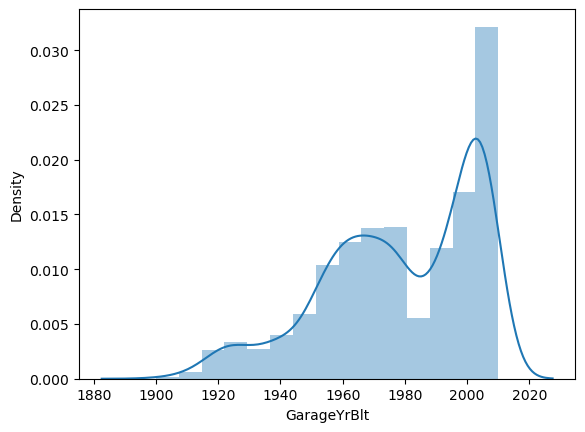

In [981]:
# Checking normality of data to impute missing values

sns.distplot(data['GarageYrBlt'])

In [982]:
data[data['GarageYrBlt'].isna() == True]

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
39      40         90       RL    65.000000     6040   Pave  NoAlley      Reg   
48      49        190       RM    33.000000     4456   Pave  NoAlley      Reg   
78      79         90       RL    72.000000    10778   Pave  NoAlley      Reg   
88      89         50  C (all)   105.000000     8470   Pave  NoAlley      IR1   
89      90         20       RL    60.000000     8070   Pave  NoAlley      Reg   
99     100         20       RL    77.000000     9320   Pave  NoAlley      IR1   
108    109         50       RM    85.000000     8500   Pave  NoAlley      Reg   
125    126        190       RM    60.000000     6780   Pave  NoAlley      Reg   
127    128         45       RM    55.000000     4388   Pave  NoAlley      IR1   
140    141         20       RL    70.000000    10500   Pave  NoAlley      Reg   
148    149         20       RL    63.000000     7500   Pave  NoAlley      Reg   
155    156         50       RL    60.000000     9600   Pave  NoAlley      Reg   
163    164         45       RL    55.000000     5500   Pave  NoAlley      Reg   
165    166        190       RL    62.000000    10106   Pave  NoAlley      Reg   
198    199         75       RM    92.000000     5520   Pave  NoAlley      Reg   
210    211         30       RL    67.000000     5604   Pave  NoAlley      Reg   
241    242         30       RM    40.000000     3880   Pave  NoAlley      Reg   
250    251         30       RL    55.000000     5350   Pave  NoAlley      IR1   
287    288         20       RL    70.049958     8125   Pave  NoAlley      IR1   
291    292        190       RL    55.000000     5687   Pave     Grvl      Reg   
307    308         50       RM    70.049958     7920   Pave     Grvl      IR1   
375    376         30       RL    70.049958    10020   Pave  NoAlley      IR1   
386    387         50       RL    58.000000     8410   Pave  NoAlley      Reg   
393    394         30       RL    70.049958     7446   Pave  NoAlley      Reg   
431    432         50       RM    60.000000     5586   Pave  NoAlley      IR1   
434    435        180       RM    21.000000     1890   Pave  NoAlley      Reg   
441    442         90       RL    92.000000    12108   Pave  NoAlley      Reg   
464    465         20       RL    60.000000     8430   Pave  NoAlley      Reg   
495    496         30  C (all)    60.000000     7879   Pave  NoAlley      Reg   
520    521        190       RL    60.000000    10800   Pave     Grvl      Reg   
528    529         30       RL    58.000000     9098   Pave  NoAlley      IR1   
533    534         20       RL    50.000000     5000   Pave  NoAlley      Reg   
535    536        190       RL    70.000000     7000   Pave  NoAlley      Reg   
562    563         30       RL    63.000000    13907   Pave  NoAlley      Reg   
582    583         90       RL    81.000000    11841   Grvl  NoAlley      Reg   
613    614         20       RL    70.000000     8402   Pave  NoAlley      Reg   
614    615        180       RM    21.000000     1491   Pave  NoAlley      Reg   
620    621         30       RL    45.000000     8248   Pave     Grvl      Reg   
635    636        190       RH    60.000000    10896   Pave     Pave      Reg   
636    637         30       RM    51.000000     6120   Pave  NoAlley      Reg   
638    639         30       RL    67.000000     8777   Pave  NoAlley      Reg   
649    650        180       RM    21.000000     1936   Pave  NoAlley      Reg   
705    706        190       RM    70.000000     5600   Pave  NoAlley      Reg   
710    711         30       RL    56.000000     4130   Pave  NoAlley      IR1   
738    739         90       RL    60.000000    10800   Pave  NoAlley      Reg   
750    751         50       RM    55.000000     8800   Pave     Grvl      Reg   
784    785         75       RM    35.000000     6300   Pave     Grvl      Reg   
826    827         45       RM    50.000000     6130   Pave  NoAlley      Reg   
843    844         90       RL    80.00

In [983]:
# Filling missing values in column

data['GarageFinish'].fillna("NoGarage", inplace=True)

In [984]:
data[data['GarageQual'].isna() == True]

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
39      40         90       RL    65.000000     6040   Pave  NoAlley      Reg   
48      49        190       RM    33.000000     4456   Pave  NoAlley      Reg   
78      79         90       RL    72.000000    10778   Pave  NoAlley      Reg   
88      89         50  C (all)   105.000000     8470   Pave  NoAlley      IR1   
89      90         20       RL    60.000000     8070   Pave  NoAlley      Reg   
99     100         20       RL    77.000000     9320   Pave  NoAlley      IR1   
108    109         50       RM    85.000000     8500   Pave  NoAlley      Reg   
125    126        190       RM    60.000000     6780   Pave  NoAlley      Reg   
127    128         45       RM    55.000000     4388   Pave  NoAlley      IR1   
140    141         20       RL    70.000000    10500   Pave  NoAlley      Reg   
148    149         20       RL    63.000000     7500   Pave  NoAlley      Reg   
155    156         50       RL    60.000000     9600   Pave  NoAlley      Reg   
163    164         45       RL    55.000000     5500   Pave  NoAlley      Reg   
165    166        190       RL    62.000000    10106   Pave  NoAlley      Reg   
198    199         75       RM    92.000000     5520   Pave  NoAlley      Reg   
210    211         30       RL    67.000000     5604   Pave  NoAlley      Reg   
241    242         30       RM    40.000000     3880   Pave  NoAlley      Reg   
250    251         30       RL    55.000000     5350   Pave  NoAlley      IR1   
287    288         20       RL    70.049958     8125   Pave  NoAlley      IR1   
291    292        190       RL    55.000000     5687   Pave     Grvl      Reg   
307    308         50       RM    70.049958     7920   Pave     Grvl      IR1   
375    376         30       RL    70.049958    10020   Pave  NoAlley      IR1   
386    387         50       RL    58.000000     8410   Pave  NoAlley      Reg   
393    394         30       RL    70.049958     7446   Pave  NoAlley      Reg   
431    432         50       RM    60.000000     5586   Pave  NoAlley      IR1   
434    435        180       RM    21.000000     1890   Pave  NoAlley      Reg   
441    442         90       RL    92.000000    12108   Pave  NoAlley      Reg   
464    465         20       RL    60.000000     8430   Pave  NoAlley      Reg   
495    496         30  C (all)    60.000000     7879   Pave  NoAlley      Reg   
520    521        190       RL    60.000000    10800   Pave     Grvl      Reg   
528    529         30       RL    58.000000     9098   Pave  NoAlley      IR1   
533    534         20       RL    50.000000     5000   Pave  NoAlley      Reg   
535    536        190       RL    70.000000     7000   Pave  NoAlley      Reg   
562    563         30       RL    63.000000    13907   Pave  NoAlley      Reg   
582    583         90       RL    81.000000    11841   Grvl  NoAlley      Reg   
613    614         20       RL    70.000000     8402   Pave  NoAlley      Reg   
614    615        180       RM    21.000000     1491   Pave  NoAlley      Reg   
620    621         30       RL    45.000000     8248   Pave     Grvl      Reg   
635    636        190       RH    60.000000    10896   Pave     Pave      Reg   
636    637         30       RM    51.000000     6120   Pave  NoAlley      Reg   
638    639         30       RL    67.000000     8777   Pave  NoAlley      Reg   
649    650        180       RM    21.000000     1936   Pave  NoAlley      Reg   
705    706        190       RM    70.000000     5600   Pave  NoAlley      Reg   
710    711         30       RL    56.000000     4130   Pave  NoAlley      IR1   
738    739         90       RL    60.000000    10800   Pave  NoAlley      Reg   
750    751         50       RM    55.000000     8800   Pave     Grvl      Reg   
784    785         75       RM    35.000000     6300   Pave     Grvl      Reg   
826    827         45       RM    50.000000     6130   Pave  NoAlley      Reg   
843    844         90       RL    80.00

In [985]:
# Filling missing values in column

data['GarageQual'].fillna("NoGarage", inplace=True)

In [986]:
# Filling missing values in column

data['GarageCond'].fillna("NoGarage", inplace=True)

In [987]:
data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [988]:
#Dropping 'PoolQC' since most of the houses dont have pool
data.drop('PoolQC', axis=1, inplace=True)

In [989]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [990]:
# Filling missing values in column

data['Fence'].fillna("NoFence", inplace=True)

In [991]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [992]:
# Filling missing values in column

data['MiscFeature'].fillna("None", inplace=True)

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

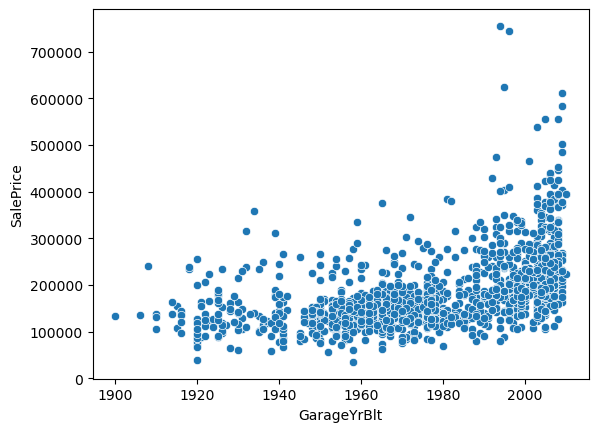

In [993]:
#Assessing impact of 'GarageYrBlt' on 'SalesPrice'

sns.scatterplot(data = data, x='GarageYrBlt', y='SalePrice')

In [994]:
# Dropping column since it has missing values

data.drop('GarageYrBlt', axis = 1, inplace=True)

In [995]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   object 
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   object 
 16  OverallCond    1451 non-null   object 
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [996]:
data.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  NoAlley      Reg   
1   2         20       RL         80.0     9600   Pave  NoAlley      Reg   
2   3         60       RL         68.0    11250   Pave  NoAlley      IR1   
3   4         70       RL         60.0     9550   Pave  NoAlley      IR1   
4   5         60       RL         84.0    14260   Pave  NoAlley      IR1   

  LandContour LotConfig  ... ScreenPorch PoolArea    Fence MiscFeature  \
0         Lvl    Inside  ...           0        0  NoFence        None   
1         Lvl       FR2  ...           0        0  NoFence        None   
2         Lvl    Inside  ...           0        0  NoFence        None   
3         Lvl    Corner  ...           0        0  NoFence        None   
4         Lvl       FR2  ...           0        0  NoFence        None   

  MiscVal MoSold YrSold  SaleType  SaleCondition SalePrice  
0       0      2   2008        WD         Normal    208500  
1       0      5   2007        WD         Normal    181500  
2       0      9   2008        WD         Normal    223500  
3       0      2   2006        WD        Abnorml    140000  
4       0     12   2008        WD         Normal    250000  

[5 rows x 76 columns]

In [997]:
# Dropping redundand column

data.drop('Id', axis=1, inplace=True)

In [998]:
# Selecting categorical data for adding dummy variable
data_categorical = data.select_dtypes(include = 'object')

# Creating dummy variable for categorical data
data_dummies = pd.get_dummies(data_categorical, drop_first=True)

# Dropping original columns of categorical data
data = data.drop(list(data_categorical.columns), axis=1)

#Concatinating categorical variable columns with original dataset
data = pd.concat([data, data_dummies], axis=1)

data.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 269 columns]

# 2. Model building and evaluation

In [999]:
# Putting response variable to y
y = data.SalePrice

# Putting feature variable to X
X = data.drop('SalePrice', axis=1)

In [1000]:
# Splitting the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
X_train

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
801     40.000000     4800       1916          1990         0.0         197   
569     70.049958     7032       1979          1979         0.0         943   
1181    64.000000     5587       2008          2008       186.0        1480   
808     85.000000    13400       1966          1966      1047.0         516   
1095    78.000000     9317       2006          2006         0.0          24   
1166    64.000000    10475       2008          2008        72.0           0   
146     51.000000     6120       1931          1993         0.0         209   
1168   120.000000    13728       1935          1986         0.0         626   
406     51.000000    10480       1936          1950         0.0           0   
45      61.000000     7658       2005          2005       412.0         456   
1163    60.000000    12900       1969          1969         0.0        1198   
770     70.049958     7252       1982          1982         0.0         685   
800     79.000000    12798       1997          1997         0.0         462   
160     70.049958    11120       1984          1984         0.0         660   
468     98.000000    11428       2006          2006       248.0           0   
554     85.000000    10625       2003          2004       292.0         866   
106     60.000000    10800       1885          1995         0.0           0   
1307    60.000000     8072       1994          1995         0.0         746   
1442    85.000000    11003       2008          2008       160.0         765   
1384    60.000000     9060       1939          1950         0.0         204   
421     70.049958    16635       1977          2000       126.0        1246   
1446    70.049958    26142       1962          1962       189.0         593   
1315    85.000000    11075       1969          1969         0.0         500   
385     43.000000     3182       2004          2005        16.0          24   
1176    37.000000     6951       1984          1985         0.0         658   
1002    75.000000    11957       2006          2006        53.0          24   
604     88.000000    12803       2002          2002        99.0         922   
125     60.000000     6780       1935          1982         0.0         490   
720     70.049958     6563       1985          1985         0.0        1148   
1316    61.000000    10226       2008          2008       270.0           0   
147     70.049958     9505       2001          2001       180.0           0   
1117    57.000000     9764       1967          2003         0.0         702   
700     85.000000    14331       2002          2002       630.0        1274   
993     68.000000     8846       2005          2006         0.0           0   
853     70.049958    12095       1964          1964       115.0         564   
527     67.000000    14948       2008          2008       268.0        1330   
51      52.000000     6240       1934          1950         0.0           0   
205     99.000000    11851       1990          1990         0.0           0   
562     63.000000    13907       1940          1969         0.0         290   
655     21.000000     1680       1971          1971       381.0           0   
713     60.000000     9873       1970          1970       160.0         789   
111     70.049958     7750       2000          2000         0.0         250   
1358    70.049958     2117       2000          2000       216.0         378   
841     60.000000    10440       1904          2002         0.0           0   
1079    65.000000     8775       1994          1994         0.0         495   
576     52.000000     6292       1928          1950         0.0           0   
859     70.049958    11029       1968          1984       220.0         619   
24      70.049958     8246       1968          2001         0.0         188   
402     60.000000    10200       1940          1997         0.0           0   
867     85.000000     6970       1961          1961     

In [1001]:
#Using 'MinMaxScaler' to fit and transform all numerical variable
scaler = MinMaxScaler()
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
X_train

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        0.065068  0.016359   0.318841      0.666667    0.000000    0.034904   
1        0.167979  0.026792   0.775362      0.483333    0.000000    0.167080   
2        0.147260  0.020038   0.985507      0.966667    0.116250    0.262225   
3        0.219178  0.056557   0.681159      0.266667    0.654375    0.091425   
4        0.195205  0.037472   0.971014      0.933333    0.000000    0.004252   
5        0.147260  0.042885   0.985507      0.966667    0.045000    0.000000   
6        0.102740  0.022529   0.427536      0.716667    0.000000    0.037030   
7        0.339041  0.058090   0.456522      0.600000    0.000000    0.110914   
8        0.102740  0.042908   0.463768      0.000000    0.000000    0.000000   
9        0.136986  0.029718   0.963768      0.916667    0.257500    0.080794   
10       0.133562  0.054220   0.702899      0.316667    0.000000    0.212261   
11       0.167979  0.027820   0.797101      0.533333    0.000000    0.121368   
12       0.198630  0.053743   0.905797      0.783333    0.000000    0.081857   
13       0.167979  0.045900   0.811594      0.566667    0.000000    0.116938   
14       0.263699  0.047339   0.971014      0.933333    0.155000    0.000000   
15       0.219178  0.043586   0.949275      0.900000    0.182500    0.153437   
16       0.133562  0.044404   0.094203      0.750000    0.000000    0.000000   
17       0.133562  0.031653   0.884058      0.750000    0.000000    0.132176   
18       0.219178  0.045353   0.985507      0.966667    0.100000    0.135542   
19       0.133562  0.036271   0.485507      0.000000    0.000000    0.036145   
20       0.167979  0.071677   0.760870      0.833333    0.078750    0.220765   
21       0.167979  0.116114   0.652174      0.200000    0.118125    0.105067   
22       0.219178  0.045689   0.702899      0.316667    0.000000    0.088590   
23       0.075342  0.008797   0.956522      0.916667    0.010000    0.004252   
24       0.054795  0.026413   0.811594      0.583333    0.000000    0.116584   
25       0.184932  0.049812   0.971014      0.933333    0.033125    0.004252   
26       0.229452  0.053766   0.942029      0.866667    0.061875    0.163359   
27       0.133562  0.025614   0.456522      0.533333    0.000000    0.086818   
28       0.167979  0.024600   0.818841      0.583333    0.000000    0.203402   
29       0.136986  0.041721   0.985507      0.966667    0.168750    0.000000   
30       0.167979  0.038351   0.934783      0.850000    0.112500    0.000000   
31       0.123288  0.039562   0.688406      0.883333    0.000000    0.124380   
32       0.219178  0.060908   0.942029      0.866667    0.393750    0.225726   
33       0.160959  0.035271   0.963768      0.933333    0.000000    0.000000   
34       0.167979  0.050457   0.666667      0.233333    0.071875    0.099929   
35       0.157534  0.063792   0.985507      0.966667    0.167500    0.235648   
36       0.106164  0.023090   0.449275      0.000000    0.000000    0.000000   
37       0.267123  0.049316   0.855072      0.666667    0.000000    0.000000   
38       0.143836  0.058926   0.492754      0.316667    0.000000    0.051382   
39       0.000000  0.001776   0.717391      0.350000    0.238125    0.000000   
40       0.133562  0.040071   0.710145      0.333333    0.100000    0.139794   
41       0.167979  0.030148   0.927536      0.833333    0.000000    0.044295   
42       0.167979  0.003819   0.927536      0.833333    0.135000    0.066974   
43       0.133562  0.042721   0.231884      0.866667    0.000000    0.000000   
44       0.150685  0.034939   0.884058      0.733333    0.000000    0.087704   
45       0.106164  0.023333   0.405797      0.000000    0.000000    0.000000   
46       0.167979  0.045474   0.695652      0.566667    0.137500    0.109674   
47       0.167979  0.032466   0.695652      0.850000    0.000000    0.033310   
48       0.133562  0.041599   0.492754      0.783333    0.000000    0.000000   
49    

In [1002]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
X_test

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0       0.078767  0.013667   0.753623      0.433333    0.000000    0.154855   
1       0.205479  0.046348   0.971014      0.933333    0.000000    0.000000   
2       0.167979  0.039870   0.630435      0.933333    0.000000    0.012757   
3       0.116438  0.020505   0.289855      0.833333    0.000000    0.037208   
4       0.195205  0.042230   0.695652      0.716667    0.000000    0.100992   
5       0.133562  0.035991   0.717391      0.350000    0.000000    0.109142   
6       0.160959  0.038094   0.594203      0.066667    0.000000    0.097803   
7       0.202055  0.041585   0.644928      0.183333    0.306875    0.051028   
8       0.167979  0.071733   0.746377      0.516667    0.000000    0.246279   
9       0.167979  0.051686   0.500000      0.000000    0.000000    0.063785   
10      0.222603  0.098717   0.333333      0.000000    0.000000    0.199858   
11      0.133562  0.028278   0.572464      0.016667    0.000000    0.150957   
12      0.150685  0.051214   0.891304      0.750000    0.320625    0.009922   
13      0.167979  0.014504   0.992754      0.983333    0.270000    0.102410   
14      0.099315  0.017294   0.536232      0.000000    0.000000    0.000000   
15      0.099315  0.017294   0.543478      0.000000    0.000000    0.070695   
16      0.219178  0.062170   0.971014      0.933333    0.365000    0.223246   
17      0.208904  0.023230   0.557971      0.000000    0.000000    0.050319   
18      0.167979  0.054537   0.652174      0.200000    0.000000    0.130581   
19      0.133562  0.027577   0.478261      0.750000    0.000000    0.000000   
20      0.143836  0.017294   0.202899      0.000000    0.000000    0.000000   
21      0.191781  0.036953   0.818841      0.583333    0.210000    0.000000   
22      0.157534  0.034948   0.275362      0.000000    0.000000    0.000000   
23      0.130137  0.049059   0.956522      0.916667    0.000000    0.000000   
24      0.167979  0.033859   0.557971      0.000000    0.212500    0.000000   
25      0.147260  0.034644   0.615942      0.833333    0.000000    0.152374   
26      0.167979  0.106523   0.492754      0.000000    0.000000    0.000000   
27      0.140411  0.324668   0.746377      0.416667    0.000000    0.116052   
28      0.150685  0.041772   0.963768      0.933333    0.000000    0.004961   
29      0.232877  0.048354   0.956522      0.900000    0.000000    0.000000   
30      0.099315  0.033654   0.347826      0.000000    0.000000    0.000000   
31      0.250000  0.042544   0.992754      0.983333    0.000000    0.000000   
32      0.147260  0.026544   0.782609      0.500000    0.000000    0.187101   
33      0.551370  0.062035   0.956522      0.900000    0.000000    0.230333   
34      0.150685  0.035729   0.688406      0.283333    0.000000    0.000000   
35      0.174658  0.046820   0.949275      0.883333    0.063125    0.000000   
36      0.167808  0.033752   0.688406      0.283333    0.000000    0.149185   
37      0.147260  0.028049   0.949275      0.883333    0.312500    0.000000   
38      0.133562  0.045329   0.500000      0.166667    0.000000    0.072289   
39      0.044521  0.019075   0.963768      0.916667    0.084375    0.159461   
40      0.263699  0.050962   0.913043      0.816667    0.609375    0.151311   
41      0.133562  0.038795   0.275362      0.866667    0.000000    0.000000   
42      0.000000  0.001776   0.717391      0.350000    0.088750    0.000000   
43      0.167979  0.071836   0.789855      0.516667    0.408125    0.000000   
44      0.150685  0.024001   0.485507      0.000000    0.000000    0.000000   
45      0.075342  0.050564   0.956522      0.916667    0.067500    0.000000   
46      0.167979  0.012386   0.391304      0.900000    0.000000    0.082920   
47      0.256849  0.046778   0.985507      0.966667    0.096250    0.165840   
48      0.075342  0.008797   0.978261      0.950000    0.010000    0.000000   
49      0.154110  0.034644   0.202899      0.000000    

## Model Building - Linear Regression

In [1003]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [1004]:
#Predicting the dependent variable using the model

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

#Calculating different metrics for the model
metric_lr = []

r2_train_lr = r2_score(y_train, y_pred_train)
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric_lr.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train, y_pred_train))
metric_lr.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test, y_pred_test))
metric_lr.append(rss_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric_lr.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric_lr.append(mse_test_lr)

rmse_train_lr = mse_train_lr**0.5
metric_lr.append(rmse_train_lr)

rmse_test_lr = mse_test_lr**0.5
metric_lr.append(rmse_test_lr)

metric_lr

[0.9080648157399148,
 -3.5626753836778066e+19,
 39778598943405.0,
 16681471998057.0,
 3.295085330735075e+21,
 3.476092554046936e+21,
 57402833821.46804,
 58958396806.95988]

## Model Building - Ridge Regression

In [1005]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [1006]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
folds = 5

model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [1007]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [1008]:
alpha = 10
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [1009]:
#Predicting the dependent variable using the model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

#Calculating different metrics for the model
metric_ridge = []

r2_train_ridge = r2_score(y_train, y_pred_train)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
metric_ridge.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train, y_pred_train))
metric_ridge.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test, y_pred_test))
metric_ridge.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
metric_ridge.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
metric_ridge.append(mse_test_ridge)

rmse_train_ridge = mse_train_ridge**0.5
metric_ridge.append(rmse_train_ridge)

rmse_test_ridge = mse_test_ridge**0.5
metric_ridge.append(rmse_test_ridge)

metric_ridge

[0.8838180219194044,
 0.8589644782817364,
 39778598943405.0,
 16681471998057.0,
 3.295085330735075e+21,
 3.476092554046936e+21,
 57402833821.46804,
 58958396806.95988]

## Model Building - Lasso Regression

In [1010]:
lasso = Lasso()
folds = 5

model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [1011]:
print(model_cv.best_params_)

{'alpha': 500}


In [1012]:
alpha = 500
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [1013]:
#Predicting the dependent variable using the model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

#Calculating different metrics for the model
metric_lasso = []

r2_train_lasso = r2_score(y_train, y_pred_train)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
metric_lasso.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train, y_pred_train))
metric_lasso.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test, y_pred_test))
metric_lasso.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
metric_lasso.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
metric_lasso.append(mse_test_lasso)

rmse_train_lasso = mse_train_lasso**0.5
metric_lasso.append(rmse_train_lasso)

rmse_test_lasso = mse_test_lasso**0.5
metric_lasso.append(rmse_test_lasso)

metric_lasso

[0.8459307525732129,
 0.826629270008757,
 39778598943405.0,
 16681471998057.0,
 3.295085330735075e+21,
 3.476092554046936e+21,
 57402833821.46804,
 58958396806.95988]

In [1014]:
#Summarizing different metrics into a dataframe
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric_lr
        }
lr_metric = pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])
ridge_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
lasso_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ridge_metric, lasso_metric], axis=1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.080648e-01      8.838180e-01      8.459308e-01
1   R2 Score (Test)      -3.562675e+19      8.589645e-01      8.266293e-01
2       RSS (Train)       3.977860e+13      3.977860e+13      3.977860e+13
3        RSS (Test)       1.668147e+13      1.668147e+13      1.668147e+13
4       MSE (Train)       3.295085e+21      3.295085e+21      3.295085e+21
5        MSE (Test)       3.476093e+21      3.476093e+21      3.476093e+21
6      RMSE (Train)       5.740283e+10      5.740283e+10      5.740283e+10
7       RMSE (Test)       5.895840e+10      5.895840e+10      5.895840e+10

In [1015]:
#Summarizing betas for different models into a dataframe
betas = pd.DataFrame(index=X.columns)
betas['Linear'] = lm.coef_
betas['Ridge Regression'] = ridge.coef_
betas['Lasso Regression'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(286)

Linear  Ridge Regression  Lasso Regression
LotFrontage             -5.540768e+04        856.555028          0.000000
LotArea                  1.117122e+05      13051.402463          0.000000
YearBuilt                1.590240e+04       2849.295274          0.000000
YearRemodAdd             8.901419e+02       9593.176263      14689.237129
MasVnrArea               1.139796e+04      15386.241102          0.000000
BsmtFinSF1               5.242559e+16       9332.476412          0.000000
BsmtFinSF2               1.040338e+16       2713.771607          0.000000
BsmtUnfSF                2.169847e+16      10511.436812          0.000000
TotalBsmtSF             -5.675414e+16      13136.929208          0.000000
1stFlrSF                -1.283486e+15      26027.629820          0.000000
2ndFlrSF                -6.230368e+14      34201.681203          0.000000
LowQualFinSF            -1.725797e+14       4138.248518         -0.000000
GrLivArea                1.570113e+15      35302.668542     167552.576107
BsmtFullBath             2.480400e+04      18078.115285       7260.714873
BsmtHalfBath            -4.753375e+03      -3753.747535         -0.000000
FullBath                 2.016900e+04      26395.168361       8454.514859
HalfBath                 1.160750e+04      14567.504387       4442.640028
BedroomAbvGr            -1.518000e+03      11004.996352          0.000000
KitchenAbvGr            -5.012300e+04      -7784.668473         -0.000000
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143
Fireplaces               1.574000e+04      16699.382698       9900.606455
GarageCars               6.600950e+04      31287.899318      53818.392614
GarageArea              -2.221050e+04      13621.560868          0.000000
WoodDeckSF               1.423075e+04      14727.678663          0.000000
OpenPorchSF             -8.641500e+03        836.351529          0.000000
EnclosedPorch            1.682631e+04       5531.902207         -0.000000
3SsnPorch                4.570750e+04       8622.408294          0.000000
ScreenPorch              1.314350e+04      10462.004465          0.000000
PoolArea                 4.551675e+04       8422.000619          0.000000
MiscVal                  1.073650e+04        132.276524          0.000000
MoSold                   3.069000e+03       1297.432358          0.000000
YrSold                  -1.847500e+03      -2342.798669         -0.000000
MSSubClass_30           -9.000000e+00      -6706.033403         -0.000000
MSSubClass_40           -3.621931e+04       1193.987601          0.000000
MSSubClass_45           -1.987250e+03       2755.557276          0.000000
MSSubClass_50            3.407875e+03       2197.226774          0.000000
MSSubClass_60           -8.608000e+03       -627.431218         76.918635
MSSubClass_70            5.959000e+03       3556.237277          0.000000
MSSubClass_75            1.629325e+04      10393.717912          0.000000
MSSubClass_80            1.070100e+04      -1325.192831         -0.000000
MSSubClass_85            1.833000e+03      -3178.725370         -0.000000
MSSubClass_90            9.038808e+15      -4220.988681      -1398.177338
MSSubClass_120          -1.629200e+04      -8762.114209         -0.000000
MSSubClass_160          -1.616325e+04      -9239.517805       -578.512041
MSSubClass_180          -3.413250e+03      -3460.945104         -0.000000
MSSubClass_190           1.693500e+03      -4665.599538         -0.000000
MSZoning_FV              5.035100e+04       6213.385338          0.000000
MSZoning_RH              5.531606e+04       5914.083726          0.000000
MSZoning_RL              4.792200e+04       6988.783302       4504.089712
MSZoning_RM              4.397600e+04        254.960489      -4637.433014
Street_Pave              2.080962e+04       5621.155212          0.000000
Alley_NoAlley           -3.634625e+03      -1660.594985          0.000000
Alley_Pave               1.737750e+03       4876.205984          0.000000
LotShape_IR2             8.995750e+

In [1016]:
#Sorting betas of Lasso Regression
betas.sort_values(by = 'Lasso Regression',ascending=False)

Linear  Ridge Regression  Lasso Regression
GrLivArea                1.570113e+15      35302.668542     167552.576107
OverallQual_9           -1.190710e+15      40354.753998      77973.961777
OverallQual_10          -1.190710e+15      35045.722091      70322.497971
GarageCars               6.600950e+04      31287.899318      53818.392614
Neighborhood_NoRidge     4.924050e+04      34456.806063      30189.544541
OverallQual_8           -1.190710e+15       8699.898880      25711.942899
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143
Neighborhood_NridgHt     3.746600e+04      21891.022705      20207.522895
BsmtExposure_Gd          1.243800e+04      16152.977898      19545.284051
YearRemodAdd             8.901419e+02       9593.176263      14689.237129
SaleType_New             4.433500e+04       8239.608332      13827.704307
Neighborhood_Crawfor     2.320225e+04      16229.031042       9912.224089
Fireplaces               1.574000e+04      16699.382698       9900.606455
Condition1_Norm          1.293600e+04       7910.527739       9782.724263
BsmtFinType1_GLQ         5.130000e+03       8732.261489       8670.315093
CentralAir_Y            -2.732000e+03       8308.388512       8506.902235
FullBath                 2.016900e+04      26395.168361       8454.514859
BsmtFullBath             2.480400e+04      18078.115285       7260.714873
Exterior1st_BrkFace      1.999306e+04      16937.140775       6274.035198
RoofStyle_Hip            1.576500e+03       5786.203589       5244.902882
LotConfig_CulDSac        6.020000e+03       7939.476302       4691.444252
MSZoning_RL              4.792200e+04       6988.783302       4504.089712
HalfBath                 1.160750e+04      14567.504387       4442.640028
Functional_Typ           7.648000e+03       6285.278218       4330.871465
GarageType_Attchd        2.070000e+04       3365.530182       4051.577918
BsmtCond_TA              6.564000e+03       8348.823135       3747.136683
OverallCond_7            9.655051e+15       7464.155683       3411.651531
FireplaceQu_Gd           1.015600e+04       2816.567075       2568.511434
Foundation_PConc         2.243000e+03        886.831806       1448.733647
MasVnrType_Stone         7.779000e+03       6947.055114        657.556743
MSSubClass_60           -8.608000e+03       -627.431218         76.918635
BsmtQual_NoBasement      4.338990e+15      -5476.726008         -0.000000
BsmtCond_Gd             -1.305000e+02       3917.958421          0.000000
BsmtQual_Fa             -1.903031e+04     -11428.974089         -0.000000
Foundation_Wood         -2.085375e+04      -2483.187608         -0.000000
BsmtCond_NoBasement      7.628358e+15      -5476.726008         -0.000000
BsmtFinType1_BLQ         1.583000e+03       2169.604395          0.000000
BsmtCond_Po             -7.501744e+14         68.897085         -0.000000
BsmtExposure_Mn         -4.876500e+03      -2747.456927          0.000000
BsmtExposure_NoBasement -1.017950e+04      -6576.465974         -0.000000
BsmtFinType1_LwQ        -6.290125e+03      -4335.021696         -0.000000
BsmtFinType1_NoBasement -1.196735e+16      -5476.726008         -0.000000
BsmtFinType1_Rec        -1.095000e+03       1457.709068          0.000000
BsmtFinType2_BLQ        -2.365450e+04      -2709.036009         -0.000000
BsmtFinType2_GLQ        -1.933975e+04      -1144.415651          0.000000
BsmtFinType2_LwQ        -1.981800e+04         65.307544          0.000000
BsmtFinType2_NoBasement  1.216250e+04      -4397.246251         -0.000000
Foundation_Stone         8.722125e+03       2125.854173         -0.000000
LotFrontage             -5.540768e+04        856.555028          0.000000
Foundation_Slab          5.212750e+03      -2786.183212         -0.000000
Exterior2nd_Plywood      5.140000e+02       -216.649131          0.000000
Exterior1st_VinylSd      9.678250e+03        896.640880          0.000000
Exterior1st_Wd Sdng      7.227000e+03       2124.694838          0.000000
Exterior1st_WdShing      8.097750e+

## Question 1

### Ridge Regression with alpha = 20

In [1017]:
alpha = 20
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [1018]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []

r2_train_ridge = r2_score(y_train, y_pred_train)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
metric_ridge.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train, y_pred_train))
metric_ridge.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test, y_pred_test))
metric_ridge.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
metric_ridge.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
metric_ridge.append(mse_test_ridge)

rmse_train_ridge = mse_train_ridge**0.5
metric_ridge.append(rmse_train_ridge)

rmse_test_ridge = mse_test_ridge**0.5
metric_ridge.append(rmse_test_ridge)

metric_ridge

[0.8690258225804893,
 0.8456117664879319,
 39778598943405.0,
 16681471998057.0,
 3.295085330735075e+21,
 3.476092554046936e+21,
 57402833821.46804,
 58958396806.95988]

In [1019]:
ridge_metric_2x = pd.Series(metric_ridge, name = 'Ridge Regression(double alpha)')
final_metric = pd.concat([final_metric, ridge_metric_2x], axis=1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)       9.080648e-01      8.838180e-01      8.459308e-01   
1   R2 Score (Test)      -3.562675e+19      8.589645e-01      8.266293e-01   
2       RSS (Train)       3.977860e+13      3.977860e+13      3.977860e+13   
3        RSS (Test)       1.668147e+13      1.668147e+13      1.668147e+13   
4       MSE (Train)       3.295085e+21      3.295085e+21      3.295085e+21   
5        MSE (Test)       3.476093e+21      3.476093e+21      3.476093e+21   
6      RMSE (Train)       5.740283e+10      5.740283e+10      5.740283e+10   
7       RMSE (Test)       5.895840e+10      5.895840e+10      5.895840e+10   

   Ridge Regression(double alpha)  
0                    8.690258e-01  
1                    8.456118e-01  
2                    3.977860e+13  
3                    1.668147e+13  
4                    3.295085e+21  
5                    3.476093e+21  
6                    5.740283e+10  
7                    5.895840e+10

In [1020]:
betas['Ridge Regression(double alpha)'] = ridge.coef_
pd.set_option('display.max_rows', None)
betas.head(286)

Linear  Ridge Regression  Lasso Regression  \
LotFrontage             -5.540768e+04        856.555028          0.000000   
LotArea                  1.117122e+05      13051.402463          0.000000   
YearBuilt                1.590240e+04       2849.295274          0.000000   
YearRemodAdd             8.901419e+02       9593.176263      14689.237129   
MasVnrArea               1.139796e+04      15386.241102          0.000000   
BsmtFinSF1               5.242559e+16       9332.476412          0.000000   
BsmtFinSF2               1.040338e+16       2713.771607          0.000000   
BsmtUnfSF                2.169847e+16      10511.436812          0.000000   
TotalBsmtSF             -5.675414e+16      13136.929208          0.000000   
1stFlrSF                -1.283486e+15      26027.629820          0.000000   
2ndFlrSF                -6.230368e+14      34201.681203          0.000000   
LowQualFinSF            -1.725797e+14       4138.248518         -0.000000   
GrLivArea                1.570113e+15      35302.668542     167552.576107   
BsmtFullBath             2.480400e+04      18078.115285       7260.714873   
BsmtHalfBath            -4.753375e+03      -3753.747535         -0.000000   
FullBath                 2.016900e+04      26395.168361       8454.514859   
HalfBath                 1.160750e+04      14567.504387       4442.640028   
BedroomAbvGr            -1.518000e+03      11004.996352          0.000000   
KitchenAbvGr            -5.012300e+04      -7784.668473         -0.000000   
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143   
Fireplaces               1.574000e+04      16699.382698       9900.606455   
GarageCars               6.600950e+04      31287.899318      53818.392614   
GarageArea              -2.221050e+04      13621.560868          0.000000   
WoodDeckSF               1.423075e+04      14727.678663          0.000000   
OpenPorchSF             -8.641500e+03        836.351529          0.000000   
EnclosedPorch            1.682631e+04       5531.902207         -0.000000   
3SsnPorch                4.570750e+04       8622.408294          0.000000   
ScreenPorch              1.314350e+04      10462.004465          0.000000   
PoolArea                 4.551675e+04       8422.000619          0.000000   
MiscVal                  1.073650e+04        132.276524          0.000000   
MoSold                   3.069000e+03       1297.432358          0.000000   
YrSold                  -1.847500e+03      -2342.798669         -0.000000   
MSSubClass_30           -9.000000e+00      -6706.033403         -0.000000   
MSSubClass_40           -3.621931e+04       1193.987601          0.000000   
MSSubClass_45           -1.987250e+03       2755.557276          0.000000   
MSSubClass_50            3.407875e+03       2197.226774          0.000000   
MSSubClass_60           -8.608000e+03       -627.431218         76.918635   
MSSubClass_70            5.959000e+03       3556.237277          0.000000   
MSSubClass_75            1.629325e+04      10393.717912          0.000000   
MSSubClass_80            1.070100e+04      -1325.192831         -0.000000   
MSSubClass_85            1.833000e+03      -3178.725370         -0.000000   
MSSubClass_90            9.038808e+15      -4220.988681      -1398.177338   
MSSubClass_120          -1.629200e+04      -8762.114209         -0.000000   
MSSubClass_160          -1.616325e+04      -9239.517805       -578.512041   
MSSubClass_180          -3.413250e+03      -3460.945104         -0.000000   
MSSubClass_190           1.693500e+03      -4665.599538         -0.000000   
MSZoning_FV              5.035100e+04       6213.385338          0.000000   
MSZoning_RH              5.531606e+04       5914.083726          0.000000   
MSZoning_RL              4.792200e+04       6988.783302       4504.089712   
MSZoning_RM              4.397600e+04        254.960489      -4637.433014   
Street_Pave              2.080962e+04       5621.155212          0.000000   
Alley_NoAlley           -3.

## Lasso Regression with alpha = 1000

In [1021]:
alpha = 1000
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [1022]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []

r2_train_lasso = r2_score(y_train, y_pred_train)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
metric_lasso.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train, y_pred_train))
metric_lasso.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test, y_pred_test))
metric_lasso.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
metric_lasso.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
metric_lasso.append(mse_test_lasso)

rmse_train_lasso = mse_train_lasso**0.5
metric_lasso.append(rmse_train_lasso)

rmse_test_lasso = mse_test_lasso**0.5
metric_lasso.append(rmse_test_lasso)

metric_lasso

[0.8049573055321276,
 0.7798340199967411,
 39778598943405.0,
 16681471998057.0,
 3.295085330735075e+21,
 3.476092554046936e+21,
 57402833821.46804,
 58958396806.95988]

In [1023]:
lasso_metric_2x = pd.Series(metric_lasso, name = 'Lasso Regression(double alpha)')
final_metric = pd.concat([final_metric, lasso_metric_2x], axis=1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)       9.080648e-01      8.838180e-01      8.459308e-01   
1   R2 Score (Test)      -3.562675e+19      8.589645e-01      8.266293e-01   
2       RSS (Train)       3.977860e+13      3.977860e+13      3.977860e+13   
3        RSS (Test)       1.668147e+13      1.668147e+13      1.668147e+13   
4       MSE (Train)       3.295085e+21      3.295085e+21      3.295085e+21   
5        MSE (Test)       3.476093e+21      3.476093e+21      3.476093e+21   
6      RMSE (Train)       5.740283e+10      5.740283e+10      5.740283e+10   
7       RMSE (Test)       5.895840e+10      5.895840e+10      5.895840e+10   

   Ridge Regression(double alpha)  Lasso Regression(double alpha)  
0                    8.690258e-01                    8.049573e-01  
1                    8.456118e-01                    7.798340e-01  
2                    3.977860e+13                    3.977860e+13  
3                    1.668147e+13                    1.668147e+13  
4                    3.295085e+21                    3.295085e+21  
5                    3.476093e+21                    3.476093e+21  
6                    5.740283e+10                    5.740283e+10  
7                    5.895840e+10                    5.895840e+10

In [1024]:
betas['Lasso Regression(double alpha)'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(286)

Linear  Ridge Regression  Lasso Regression  \
LotFrontage             -5.540768e+04        856.555028          0.000000   
LotArea                  1.117122e+05      13051.402463          0.000000   
YearBuilt                1.590240e+04       2849.295274          0.000000   
YearRemodAdd             8.901419e+02       9593.176263      14689.237129   
MasVnrArea               1.139796e+04      15386.241102          0.000000   
BsmtFinSF1               5.242559e+16       9332.476412          0.000000   
BsmtFinSF2               1.040338e+16       2713.771607          0.000000   
BsmtUnfSF                2.169847e+16      10511.436812          0.000000   
TotalBsmtSF             -5.675414e+16      13136.929208          0.000000   
1stFlrSF                -1.283486e+15      26027.629820          0.000000   
2ndFlrSF                -6.230368e+14      34201.681203          0.000000   
LowQualFinSF            -1.725797e+14       4138.248518         -0.000000   
GrLivArea                1.570113e+15      35302.668542     167552.576107   
BsmtFullBath             2.480400e+04      18078.115285       7260.714873   
BsmtHalfBath            -4.753375e+03      -3753.747535         -0.000000   
FullBath                 2.016900e+04      26395.168361       8454.514859   
HalfBath                 1.160750e+04      14567.504387       4442.640028   
BedroomAbvGr            -1.518000e+03      11004.996352          0.000000   
KitchenAbvGr            -5.012300e+04      -7784.668473         -0.000000   
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143   
Fireplaces               1.574000e+04      16699.382698       9900.606455   
GarageCars               6.600950e+04      31287.899318      53818.392614   
GarageArea              -2.221050e+04      13621.560868          0.000000   
WoodDeckSF               1.423075e+04      14727.678663          0.000000   
OpenPorchSF             -8.641500e+03        836.351529          0.000000   
EnclosedPorch            1.682631e+04       5531.902207         -0.000000   
3SsnPorch                4.570750e+04       8622.408294          0.000000   
ScreenPorch              1.314350e+04      10462.004465          0.000000   
PoolArea                 4.551675e+04       8422.000619          0.000000   
MiscVal                  1.073650e+04        132.276524          0.000000   
MoSold                   3.069000e+03       1297.432358          0.000000   
YrSold                  -1.847500e+03      -2342.798669         -0.000000   
MSSubClass_30           -9.000000e+00      -6706.033403         -0.000000   
MSSubClass_40           -3.621931e+04       1193.987601          0.000000   
MSSubClass_45           -1.987250e+03       2755.557276          0.000000   
MSSubClass_50            3.407875e+03       2197.226774          0.000000   
MSSubClass_60           -8.608000e+03       -627.431218         76.918635   
MSSubClass_70            5.959000e+03       3556.237277          0.000000   
MSSubClass_75            1.629325e+04      10393.717912          0.000000   
MSSubClass_80            1.070100e+04      -1325.192831         -0.000000   
MSSubClass_85            1.833000e+03      -3178.725370         -0.000000   
MSSubClass_90            9.038808e+15      -4220.988681      -1398.177338   
MSSubClass_120          -1.629200e+04      -8762.114209         -0.000000   
MSSubClass_160          -1.616325e+04      -9239.517805       -578.512041   
MSSubClass_180          -3.413250e+03      -3460.945104         -0.000000   
MSSubClass_190           1.693500e+03      -4665.599538         -0.000000   
MSZoning_FV              5.035100e+04       6213.385338          0.000000   
MSZoning_RH              5.531606e+04       5914.083726          0.000000   
MSZoning_RL              4.792200e+04       6988.783302       4504.089712   
MSZoning_RM              4.397600e+04        254.960489      -4637.433014   
Street_Pave              2.080962e+04       5621.155212          0.000000   
Alley_NoAlley           -3.

In [1025]:
betas.sort_values(by = 'Ridge Regression',ascending=False, key=abs)

Linear  Ridge Regression  Lasso Regression  \
OverallQual_9           -1.190710e+15      40354.753998      77973.961777   
GrLivArea                1.570113e+15      35302.668542     167552.576107   
OverallQual_10          -1.190710e+15      35045.722091      70322.497971   
Neighborhood_NoRidge     4.924050e+04      34456.806063      30189.544541   
2ndFlrSF                -6.230368e+14      34201.681203          0.000000   
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143   
GarageCars               6.600950e+04      31287.899318      53818.392614   
FullBath                 2.016900e+04      26395.168361       8454.514859   
1stFlrSF                -1.283486e+15      26027.629820          0.000000   
Neighborhood_NridgHt     3.746600e+04      21891.022705      20207.522895   
Neighborhood_StoneBr     3.648275e+04      19936.043949          0.000000   
BsmtQual_Gd             -2.300400e+04     -19388.813780       -811.268253   
BsmtQual_TA             -2.202000e+04     -19327.171623       -540.697561   
OverallQual_5           -1.190710e+15     -19092.168752      -4983.347264   
BsmtFullBath             2.480400e+04      18078.115285       7260.714873   
KitchenQual_TA          -1.439550e+04     -17858.012403      -9371.567401   
OverallQual_3           -1.190710e+15     -17104.305195         -0.000000   
OverallQual_4           -1.190710e+15     -16988.747550      -5099.774839   
Exterior1st_BrkFace      1.999306e+04      16937.140775       6274.035198   
Fireplaces               1.574000e+04      16699.382698       9900.606455   
OverallQual_6           -1.190710e+15     -16479.914275      -4410.210173   
Exterior2nd_ImStucc      3.939662e+04      16455.326458          0.000000   
Neighborhood_Crawfor     2.320225e+04      16229.031042       9912.224089   
BsmtExposure_Gd          1.243800e+04      16152.977898      19545.284051   
OverallCond_9            9.655051e+15      15744.531300          0.000000   
Neighborhood_Edwards    -1.805075e+04     -15530.626231      -8585.868866   
MasVnrArea               1.139796e+04      15386.241102          0.000000   
KitchenQual_Gd          -1.315600e+04     -14902.408908      -1679.733631   
WoodDeckSF               1.423075e+04      14727.678663          0.000000   
HalfBath                 1.160750e+04      14567.504387       4442.640028   
GarageArea              -2.221050e+04      13621.560868          0.000000   
TotalBsmtSF             -5.675414e+16      13136.929208          0.000000   
LotArea                  1.117122e+05      13051.402463          0.000000   
LandContour_Lvl          2.566100e+04      12266.867035          0.000000   
LandContour_HLS          2.154350e+04      11795.776149          0.000000   
BsmtQual_Fa             -1.903031e+04     -11428.974089         -0.000000   
Neighborhood_MeadowV    -2.036025e+04     -11300.643629         -0.000000   
OverallCond_3            9.655051e+15     -11280.829403         -0.000000   
BldgType_Twnhs          -1.072300e+04     -11217.829113         -0.000000   
BedroomAbvGr            -1.518000e+03      11004.996352          0.000000   
LotShape_IR2             8.995750e+03      10735.537589          0.000000   
OverallCond_4            9.655051e+15     -10717.689329      -4822.463841   
Neighborhood_Gilbert    -1.465000e+03     -10570.301999         -0.000000   
BsmtUnfSF                2.169847e+16      10511.436812          0.000000   
ScreenPorch              1.314350e+04      10462.004465          0.000000   
MSSubClass_75            1.629325e+04      10393.717912          0.000000   
Neighborhood_IDOTRR     -4.564125e+03     -10006.172323         -0.000000   
YearRemodAdd             8.901419e+02       9593.176263      14689.237129   
ExterQual_TA             1.053725e+04      -9497.127573     -11207.979261   
BsmtFinSF1               5.242559e+16       9332.476412          0.000000   
MSSubClass_160          -1.616325e+04      -9239.517805       -578.512041   
BldgType_TwnhsE         -4.

In [1026]:
betas.sort_values(by = 'Lasso Regression',ascending=False, key=abs)

Linear  Ridge Regression  Lasso Regression  \
GrLivArea                1.570113e+15      35302.668542     167552.576107   
OverallQual_9           -1.190710e+15      40354.753998      77973.961777   
OverallQual_10          -1.190710e+15      35045.722091      70322.497971   
GarageCars               6.600950e+04      31287.899318      53818.392614   
Neighborhood_NoRidge     4.924050e+04      34456.806063      30189.544541   
OverallQual_8           -1.190710e+15       8699.898880      25711.942899   
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143   
Neighborhood_NridgHt     3.746600e+04      21891.022705      20207.522895   
BsmtExposure_Gd          1.243800e+04      16152.977898      19545.284051   
YearRemodAdd             8.901419e+02       9593.176263      14689.237129   
SaleType_New             4.433500e+04       8239.608332      13827.704307   
ExterQual_TA             1.053725e+04      -9497.127573     -11207.979261   
Neighborhood_Crawfor     2.320225e+04      16229.031042       9912.224089   
Fireplaces               1.574000e+04      16699.382698       9900.606455   
Condition1_Norm          1.293600e+04       7910.527739       9782.724263   
KitchenQual_TA          -1.439550e+04     -17858.012403      -9371.567401   
BsmtFinType1_GLQ         5.130000e+03       8732.261489       8670.315093   
Neighborhood_Edwards    -1.805075e+04     -15530.626231      -8585.868866   
CentralAir_Y            -2.732000e+03       8308.388512       8506.902235   
FullBath                 2.016900e+04      26395.168361       8454.514859   
FireplaceQu_NoFireplace  1.271600e+04       -695.709329      -7415.009338   
BsmtFullBath             2.480400e+04      18078.115285       7260.714873   
BsmtFinType1_Unf        -9.683000e+03      -8006.853876      -6321.864847   
Exterior1st_BrkFace      1.999306e+04      16937.140775       6274.035198   
RoofStyle_Hip            1.576500e+03       5786.203589       5244.902882   
OverallQual_4           -1.190710e+15     -16988.747550      -5099.774839   
OverallQual_5           -1.190710e+15     -19092.168752      -4983.347264   
GarageFinish_Unf        -5.968750e+03      -5097.447634      -4906.684402   
OverallCond_4            9.655051e+15     -10717.689329      -4822.463841   
LotConfig_CulDSac        6.020000e+03       7939.476302       4691.444252   
MSZoning_RM              4.397600e+04        254.960489      -4637.433014   
BldgType_TwnhsE         -4.987875e+03      -9059.442941      -4510.096602   
MSZoning_RL              4.792200e+04       6988.783302       4504.089712   
HalfBath                 1.160750e+04      14567.504387       4442.640028   
OverallQual_6           -1.190710e+15     -16479.914275      -4410.210173   
Functional_Typ           7.648000e+03       6285.278218       4330.871465   
GarageType_Attchd        2.070000e+04       3365.530182       4051.577918   
RoofStyle_Gable         -5.945000e+03      -4172.867770      -3777.698096   
BsmtCond_TA              6.564000e+03       8348.823135       3747.136683   
OverallCond_7            9.655051e+15       7464.155683       3411.651531   
LotShape_Reg             8.100000e+02      -1873.182548      -3347.787455   
BsmtExposure_No         -6.596000e+03      -8072.082897      -2978.985233   
FireplaceQu_Gd           1.015600e+04       2816.567075       2568.511434   
KitchenQual_Gd          -1.315600e+04     -14902.408908      -1679.733631   
Foundation_PConc         2.243000e+03        886.831806       1448.733647   
MSSubClass_90            9.038808e+15      -4220.988681      -1398.177338   
BsmtQual_Gd             -2.300400e+04     -19388.813780       -811.268253   
GarageType_Detchd        1.719162e+04      -1886.877270       -742.251186   
MasVnrType_Stone         7.779000e+03       6947.055114        657.556743   
HeatingQC_TA            -1.506000e+03      -2549.673460       -583.743896   
MSSubClass_160          -1.616325e+04      -9239.517805       -578.512041   
BsmtQual_TA             -2.

In [1027]:
betas.sort_values(by = 'Ridge Regression(double alpha)',ascending=False, key=abs)

Linear  Ridge Regression  Lasso Regression  \
OverallQual_9           -1.190710e+15      40354.753998      77973.961777   
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143   
Neighborhood_NoRidge     4.924050e+04      34456.806063      30189.544541   
GrLivArea                1.570113e+15      35302.668542     167552.576107   
OverallQual_10          -1.190710e+15      35045.722091      70322.497971   
2ndFlrSF                -6.230368e+14      34201.681203          0.000000   
GarageCars               6.600950e+04      31287.899318      53818.392614   
FullBath                 2.016900e+04      26395.168361       8454.514859   
1stFlrSF                -1.283486e+15      26027.629820          0.000000   
Neighborhood_NridgHt     3.746600e+04      21891.022705      20207.522895   
KitchenQual_TA          -1.439550e+04     -17858.012403      -9371.567401   
BsmtQual_Gd             -2.300400e+04     -19388.813780       -811.268253   
BsmtQual_TA             -2.202000e+04     -19327.171623       -540.697561   
OverallQual_5           -1.190710e+15     -19092.168752      -4983.347264   
BsmtExposure_Gd          1.243800e+04      16152.977898      19545.284051   
OverallQual_6           -1.190710e+15     -16479.914275      -4410.210173   
GarageArea              -2.221050e+04      13621.560868          0.000000   
Neighborhood_StoneBr     3.648275e+04      19936.043949          0.000000   
BsmtFullBath             2.480400e+04      18078.115285       7260.714873   
OverallQual_4           -1.190710e+15     -16988.747550      -5099.774839   
Fireplaces               1.574000e+04      16699.382698       9900.606455   
Exterior1st_BrkFace      1.999306e+04      16937.140775       6274.035198   
KitchenQual_Gd          -1.315600e+04     -14902.408908      -1679.733631   
Neighborhood_Edwards    -1.805075e+04     -15530.626231      -8585.868866   
MasVnrArea               1.139796e+04      15386.241102          0.000000   
Neighborhood_Crawfor     2.320225e+04      16229.031042       9912.224089   
HalfBath                 1.160750e+04      14567.504387       4442.640028   
WoodDeckSF               1.423075e+04      14727.678663          0.000000   
ExterQual_TA             1.053725e+04      -9497.127573     -11207.979261   
TotalBsmtSF             -5.675414e+16      13136.929208          0.000000   
OverallCond_9            9.655051e+15      15744.531300          0.000000   
OverallQual_3           -1.190710e+15     -17104.305195         -0.000000   
Neighborhood_Gilbert    -1.465000e+03     -10570.301999         -0.000000   
YearRemodAdd             8.901419e+02       9593.176263      14689.237129   
Exterior2nd_ImStucc      3.939662e+04      16455.326458          0.000000   
BsmtUnfSF                2.169847e+16      10511.436812          0.000000   
BsmtFinType1_GLQ         5.130000e+03       8732.261489       8670.315093   
BedroomAbvGr            -1.518000e+03      11004.996352          0.000000   
OverallQual_8           -1.190710e+15       8699.898880      25711.942899   
OverallCond_4            9.655051e+15     -10717.689329      -4822.463841   
BldgType_Twnhs          -1.072300e+04     -11217.829113         -0.000000   
LotShape_IR2             8.995750e+03      10735.537589          0.000000   
BldgType_TwnhsE         -4.987875e+03      -9059.442941      -4510.096602   
ScreenPorch              1.314350e+04      10462.004465          0.000000   
LotArea                  1.117122e+05      13051.402463          0.000000   
BsmtFinSF1               5.242559e+16       9332.476412          0.000000   
OverallCond_3            9.655051e+15     -11280.829403         -0.000000   
CentralAir_Y            -2.732000e+03       8308.388512       8506.902235   
LandContour_HLS          2.154350e+04      11795.776149          0.000000   
MSSubClass_75            1.629325e+04      10393.717912          0.000000   
Neighborhood_MeadowV    -2.036025e+04     -11300.643629         -0.000000   
BsmtQual_Fa             -1.

In [1028]:
betas.sort_values(by = 'Lasso Regression(double alpha)',ascending=False, key=abs)

Linear  Ridge Regression  Lasso Regression  \
GrLivArea                1.570113e+15      35302.668542     167552.576107   
OverallQual_9           -1.190710e+15      40354.753998      77973.961777   
GarageCars               6.600950e+04      31287.899318      53818.392614   
OverallQual_10          -1.190710e+15      35045.722091      70322.497971   
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143   
OverallQual_8           -1.190710e+15       8699.898880      25711.942899   
BsmtExposure_Gd          1.243800e+04      16152.977898      19545.284051   
Neighborhood_NridgHt     3.746600e+04      21891.022705      20207.522895   
Neighborhood_NoRidge     4.924050e+04      34456.806063      30189.544541   
FireplaceQu_NoFireplace  1.271600e+04       -695.709329      -7415.009338   
ExterQual_TA             1.053725e+04      -9497.127573     -11207.979261   
YearRemodAdd             8.901419e+02       9593.176263      14689.237129   
BsmtFinType1_GLQ         5.130000e+03       8732.261489       8670.315093   
KitchenQual_TA          -1.439550e+04     -17858.012403      -9371.567401   
SaleType_New             4.433500e+04       8239.608332      13827.704307   
RoofStyle_Hip            1.576500e+03       5786.203589       5244.902882   
MSZoning_RL              4.792200e+04       6988.783302       4504.089712   
Condition1_Norm          1.293600e+04       7910.527739       9782.724263   
LotShape_Reg             8.100000e+02      -1873.182548      -3347.787455   
GarageFinish_Unf        -5.968750e+03      -5097.447634      -4906.684402   
GarageType_Attchd        2.070000e+04       3365.530182       4051.577918   
BsmtFinType1_Unf        -9.683000e+03      -8006.853876      -6321.864847   
MSSubClass_60           -8.608000e+03       -627.431218         76.918635   
RoofStyle_Gable         -5.945000e+03      -4172.867770      -3777.698096   
BsmtExposure_No         -6.596000e+03      -8072.082897      -2978.985233   
CentralAir_Y            -2.732000e+03       8308.388512       8506.902235   
FireplaceQu_Gd           1.015600e+04       2816.567075       2568.511434   
MSZoning_RM              4.397600e+04        254.960489      -4637.433014   
OverallQual_6           -1.190710e+15     -16479.914275      -4410.210173   
OverallQual_5           -1.190710e+15     -19092.168752      -4983.347264   
Neighborhood_Edwards    -1.805075e+04     -15530.626231      -8585.868866   
Foundation_PConc         2.243000e+03        886.831806       1448.733647   
HalfBath                 1.160750e+04      14567.504387       4442.640028   
MasVnrType_None          5.859000e+03       2254.764383         -0.000000   
BsmtQual_TA             -2.202000e+04     -19327.171623       -540.697561   
Exterior2nd_CmentBd      2.648700e+04       2987.816820          0.000000   
BsmtCond_Po             -7.501744e+14         68.897085         -0.000000   
BsmtCond_TA              6.564000e+03       8348.823135       3747.136683   
Exterior2nd_ImStucc      3.939662e+04      16455.326458          0.000000   
BsmtExposure_Mn         -4.876500e+03      -2747.456927          0.000000   
BsmtExposure_NoBasement -1.017950e+04      -6576.465974         -0.000000   
Exterior2nd_HdBoard      7.022500e+02        486.697579         -0.000000   
BsmtFinType1_BLQ         1.583000e+03       2169.604395          0.000000   
BsmtFinType2_NoBasement  1.216250e+04      -4397.246251         -0.000000   
BsmtFinType1_LwQ        -6.290125e+03      -4335.021696         -0.000000   
BsmtFinType1_NoBasement -1.196735e+16      -5476.726008         -0.000000   
BsmtCond_NoBasement      7.628358e+15      -5476.726008         -0.000000   
Exterior2nd_BrkFace      1.156875e+04       6352.623632          0.000000   
Exterior2nd_CBlock       1.774968e+14      -1855.230882         -0.000000   
BsmtFinType2_Unf        -2.253400e+04      -1917.309012          0.000000   
BsmtFinType2_Rec        -2.260200e+04      -1728.327919          0.000000   
BsmtFinType2_BLQ        -2.

## Question 3

In [1029]:
betas.sort_values(by = 'Lasso Regression',ascending=False, key=abs)

Linear  Ridge Regression  Lasso Regression  \
GrLivArea                1.570113e+15      35302.668542     167552.576107   
OverallQual_9           -1.190710e+15      40354.753998      77973.961777   
OverallQual_10          -1.190710e+15      35045.722091      70322.497971   
GarageCars               6.600950e+04      31287.899318      53818.392614   
Neighborhood_NoRidge     4.924050e+04      34456.806063      30189.544541   
OverallQual_8           -1.190710e+15       8699.898880      25711.942899   
TotRmsAbvGrd             3.352500e+04      33117.844251      24457.016143   
Neighborhood_NridgHt     3.746600e+04      21891.022705      20207.522895   
BsmtExposure_Gd          1.243800e+04      16152.977898      19545.284051   
YearRemodAdd             8.901419e+02       9593.176263      14689.237129   
SaleType_New             4.433500e+04       8239.608332      13827.704307   
ExterQual_TA             1.053725e+04      -9497.127573     -11207.979261   
Neighborhood_Crawfor     2.320225e+04      16229.031042       9912.224089   
Fireplaces               1.574000e+04      16699.382698       9900.606455   
Condition1_Norm          1.293600e+04       7910.527739       9782.724263   
KitchenQual_TA          -1.439550e+04     -17858.012403      -9371.567401   
BsmtFinType1_GLQ         5.130000e+03       8732.261489       8670.315093   
Neighborhood_Edwards    -1.805075e+04     -15530.626231      -8585.868866   
CentralAir_Y            -2.732000e+03       8308.388512       8506.902235   
FullBath                 2.016900e+04      26395.168361       8454.514859   
FireplaceQu_NoFireplace  1.271600e+04       -695.709329      -7415.009338   
BsmtFullBath             2.480400e+04      18078.115285       7260.714873   
BsmtFinType1_Unf        -9.683000e+03      -8006.853876      -6321.864847   
Exterior1st_BrkFace      1.999306e+04      16937.140775       6274.035198   
RoofStyle_Hip            1.576500e+03       5786.203589       5244.902882   
OverallQual_4           -1.190710e+15     -16988.747550      -5099.774839   
OverallQual_5           -1.190710e+15     -19092.168752      -4983.347264   
GarageFinish_Unf        -5.968750e+03      -5097.447634      -4906.684402   
OverallCond_4            9.655051e+15     -10717.689329      -4822.463841   
LotConfig_CulDSac        6.020000e+03       7939.476302       4691.444252   
MSZoning_RM              4.397600e+04        254.960489      -4637.433014   
BldgType_TwnhsE         -4.987875e+03      -9059.442941      -4510.096602   
MSZoning_RL              4.792200e+04       6988.783302       4504.089712   
HalfBath                 1.160750e+04      14567.504387       4442.640028   
OverallQual_6           -1.190710e+15     -16479.914275      -4410.210173   
Functional_Typ           7.648000e+03       6285.278218       4330.871465   
GarageType_Attchd        2.070000e+04       3365.530182       4051.577918   
RoofStyle_Gable         -5.945000e+03      -4172.867770      -3777.698096   
BsmtCond_TA              6.564000e+03       8348.823135       3747.136683   
OverallCond_7            9.655051e+15       7464.155683       3411.651531   
LotShape_Reg             8.100000e+02      -1873.182548      -3347.787455   
BsmtExposure_No         -6.596000e+03      -8072.082897      -2978.985233   
FireplaceQu_Gd           1.015600e+04       2816.567075       2568.511434   
KitchenQual_Gd          -1.315600e+04     -14902.408908      -1679.733631   
Foundation_PConc         2.243000e+03        886.831806       1448.733647   
MSSubClass_90            9.038808e+15      -4220.988681      -1398.177338   
BsmtQual_Gd             -2.300400e+04     -19388.813780       -811.268253   
GarageType_Detchd        1.719162e+04      -1886.877270       -742.251186   
MasVnrType_Stone         7.779000e+03       6947.055114        657.556743   
HeatingQC_TA            -1.506000e+03      -2549.673460       -583.743896   
MSSubClass_160          -1.616325e+04      -9239.517805       -578.512041   
BsmtQual_TA             -2.

In [1030]:
# Dropping top 5 features from train dataset
X_train.drop(['GrLivArea','OverallQual_9','OverallQual_10','GarageCars','Neighborhood_NoRidge'], axis=1, inplace=True)

In [1031]:
# Dropping top 5 features from test dataset
X_test.drop(['GrLivArea','OverallQual_9','OverallQual_10','GarageCars','Neighborhood_NoRidge'], axis=1, inplace=True)

In [1032]:
alpha = 500
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [1033]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []

r2_train_lasso = r2_score(y_train, y_pred_train)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
metric_lasso.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train, y_pred_train))
metric_lasso.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test, y_pred_test))
metric_lasso.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
metric_lasso.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
metric_lasso.append(mse_test_lasso)

rmse_train_lasso = mse_train_lasso**0.5
metric_lasso.append(rmse_train_lasso)

rmse_test_lasso = mse_test_lasso**0.5
metric_lasso.append(rmse_test_lasso)

metric_lasso

[0.8190181093299812,
 0.8063494937811461,
 39778598943405.0,
 16681471998057.0,
 3.295085330735075e+21,
 3.476092554046936e+21,
 57402833821.46804,
 58958396806.95988]

In [1034]:
lasso_metric_featureDrop = pd.Series(metric_lasso, name = 'Lasso Regression(Feature Drop)')
final_metric = pd.concat([final_metric, lasso_metric_featureDrop], axis=1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)       9.080648e-01      8.838180e-01      8.459308e-01   
1   R2 Score (Test)      -3.562675e+19      8.589645e-01      8.266293e-01   
2       RSS (Train)       3.977860e+13      3.977860e+13      3.977860e+13   
3        RSS (Test)       1.668147e+13      1.668147e+13      1.668147e+13   
4       MSE (Train)       3.295085e+21      3.295085e+21      3.295085e+21   
5        MSE (Test)       3.476093e+21      3.476093e+21      3.476093e+21   
6      RMSE (Train)       5.740283e+10      5.740283e+10      5.740283e+10   
7       RMSE (Test)       5.895840e+10      5.895840e+10      5.895840e+10   

   Ridge Regression(double alpha)  Lasso Regression(double alpha)  \
0                    8.690258e-01                    8.049573e-01   
1                    8.456118e-01                    7.798340e-01   
2                    3.977860e+13                    3.977860e+13   
3                    1.668147e+13                    1.668147e+13   
4                    3.295085e+21                    3.295085e+21   
5                    3.476093e+21                    3.476093e+21   
6                    5.740283e+10                    5.740283e+10   
7                    5.895840e+10                    5.895840e+10   

   Lasso Regression(Feature Drop)  
0                    8.190181e-01  
1                    8.063495e-01  
2                    3.977860e+13  
3                    1.668147e+13  
4                    3.295085e+21  
5                    3.476093e+21  
6                    5.740283e+10  
7                    5.895840e+10

In [1035]:
betas_featureDrop = pd.DataFrame(index=X_train.columns)
betas_featureDrop['Lasso Regression(feature drop)'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas_featureDrop.head(286)

Lasso Regression(feature drop)
LotFrontage                                    0.000000
LotArea                                        0.000000
YearBuilt                                      0.000000
YearRemodAdd                               15760.986731
MasVnrArea                                  9410.418977
BsmtFinSF1                                     0.000000
BsmtFinSF2                                     0.000000
BsmtUnfSF                                      0.000000
TotalBsmtSF                                    0.000000
1stFlrSF                                  117360.266477
2ndFlrSF                                   61637.511414
LowQualFinSF                                   0.000000
BsmtFullBath                                9353.333957
BsmtHalfBath                                  -0.000000
FullBath                                   15573.287410
HalfBath                                    7851.098502
BedroomAbvGr                                   0.000000
KitchenAbvGr                                  -0.000000
TotRmsAbvGrd                               45469.289130
Fireplaces                                 14651.532087
GarageArea                                 47160.335523
WoodDeckSF                                  4378.975464
OpenPorchSF                                    0.000000
EnclosedPorch                                  0.000000
3SsnPorch                                      0.000000
ScreenPorch                                    0.000000
PoolArea                                       0.000000
MiscVal                                       -0.000000
MoSold                                         0.000000
YrSold                                        -0.000000
MSSubClass_30                                 -0.000000
MSSubClass_40                                  0.000000
MSSubClass_45                                  0.000000
MSSubClass_50                                  0.000000
MSSubClass_60                                  0.000000
MSSubClass_70                                  0.000000
MSSubClass_75                                  0.000000
MSSubClass_80                                 -0.000000
MSSubClass_85                                 -0.000000
MSSubClass_90                               -921.874319
MSSubClass_120                                -0.000000
MSSubClass_160                              -515.146970
MSSubClass_180                                -0.000000
MSSubClass_190                                -0.000000
MSZoning_FV                                    0.000000
MSZoning_RH                                    0.000000
MSZoning_RL                                 6925.464897
MSZoning_RM                                -1456.647562
Street_Pave                                    0.000000
Alley_NoAlley                                  0.000000
Alley_Pave                                     0.000000
LotShape_IR2                                 447.921602
LotShape_IR3                                  -0.000000
LotShape_Reg                               -4536.547937
LandContour_HLS                                0.000000
LandContour_Low                                0.000000
LandContour_Lvl                                0.000000
LotConfig_CulDSac                           7333.270144
LotConfig_FR2                                 -0.000000
LotConfig_FR3                                 -0.000000
LotConfig_Inside                           -1118.434414
LandSlope_Mod                                  0.000000
LandSlope_Sev                                  0.000000
Neighborhood_Blueste                          -0.000000
Neighborhood_BrDale                           -0.000000
Neighborhood_BrkSide                           0.000000
Neighborhood_ClearCr                           0.000000
Neighborhood_CollgCr                          -0.000000
Neighborhood_Crawfor                        7011.607937
Neighborhood_Edwards                      -11049.320815
Neighborhood_Gilbert                        -937.

In [1036]:
betas_featureDrop.sort_values(by = 'Lasso Regression(feature drop)',ascending=False, key=abs)

Lasso Regression(feature drop)
1stFlrSF                                  117360.266477
2ndFlrSF                                   61637.511414
GarageArea                                 47160.335523
TotRmsAbvGrd                               45469.289130
Neighborhood_NridgHt                       26077.129466
BsmtExposure_Gd                            22846.436703
OverallQual_6                             -21382.002931
OverallQual_5                             -21049.290818
KitchenQual_TA                            -20773.073904
OverallQual_4                             -19820.273039
ExterQual_TA                              -16942.990472
YearRemodAdd                               15760.986731
FullBath                                   15573.287410
OverallQual_7                             -15272.763486
KitchenQual_Gd                            -14922.155331
Fireplaces                                 14651.532087
RoofStyle_Hip                              13815.871595
BsmtFinType1_GLQ                           12222.267637
SaleType_New                               11718.157342
Neighborhood_Edwards                      -11049.320815
CentralAir_Y                               10671.847198
BsmtQual_Gd                               -10257.048969
Condition1_Norm                             9417.513598
MasVnrArea                                  9410.418977
BsmtFullBath                                9353.333957
FireplaceQu_NoFireplace                    -9281.911188
BsmtQual_TA                                -9162.950929
Exterior1st_BrkFace                         8548.577870
HalfBath                                    7851.098502
OverallCond_4                              -7562.384423
LotConfig_CulDSac                           7333.270144
Neighborhood_Crawfor                        7011.607937
MSZoning_RL                                 6925.464897
Functional_Typ                              6397.903922
BsmtCond_TA                                 5880.048486
BsmtFinType1_Unf                           -5472.134948
Neighborhood_StoneBr                        4685.504290
GarageType_Attchd                           4563.660769
LotShape_Reg                               -4536.547937
WoodDeckSF                                  4378.975464
BsmtExposure_No                            -3983.620237
BldgType_TwnhsE                            -3963.586911
BsmtExposure_NoBasement                    -3613.590437
OverallQual_3                              -3572.820306
Foundation_PConc                            3289.644086
OverallCond_7                               2875.927091
GarageFinish_Unf                           -2751.499363
BldgType_Duplex                            -2342.374302
Condition1_Feedr                           -2048.497729
HeatingQC_TA                               -1560.251056
MasVnrType_Stone                            1487.463995
BldgType_Twnhs                             -1484.155145
MSZoning_RM                                -1456.647562
PavedDrive_Y                                1392.427722
LotConfig_Inside                           -1118.434414
Neighborhood_Gilbert                        -937.256464
MSSubClass_90                               -921.874319
GarageFinish_RFn                            -894.576126
Neighborhood_NAmes                          -550.164246
MSSubClass_160                              -515.146970
LotShape_IR2                                 447.921602
GarageCond_TA                                366.592089
FireplaceQu_Gd                               341.127906
RoofStyle_Gable                             -334.966045
HeatingQC_Gd                                -121.996465
BsmtCond_Po                                   -0.000000
BsmtFinType2_GLQ                              -0.000000
MasVnrType_BrkFace                             0.000000
Heating_Grav                                  -0.000000
Heating_GasW                                   0.000000
Heating_GasA                                   0.